<a href="https://colab.research.google.com/github/jiyanshud22/CS786A2/blob/main/CS786A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS786** Assignment 2

Jiyanshu Dhaka 220481

# Q1.
(40 points)
Without using any third-party libraries or toolboxes, write code to

# (a) take any three variable Boolean function as input


In [ ]:
import numpy as np
from numpy.random import rand as U
import random
import matplotlib.pyplot as plt

A Boolean function is defined as:
f(a,b,c):{0, 1}<sup>3</sup> →{0,1} where a,b, and c are binary inputs.

let for this part the 3 variables are x,y,and z.

function can be written using Boolean operators NOT('),AND(.),and OR(+).

function should have disjunctive normal form(sum of products) like x.z+y.z'+x'.y'.z'

## Function to take input Boolean expression


In [ ]:
# Default function
default_function = "a'.b.c + b'.c + c'"

# User input or default function
f = input("Enter the Boolean Function (or press Enter to use default a'.b.c + b'.c + c'): ") or default_function
bool_expression = ""


Enter the Boolean Function (or press Enter to use default a'.b.c + b'.c + c'): 


## Convert input Boolean function into mathematical expression
like for example if Function: x'.y.z + y'.z + z'
then covert it to (1 - x)*y*z + (1 - y)*z + (1 - z)

Conversion Steps:

x'y z becomes (1 - x) * y * z

y'z becomes (1 - y) * z

z' becomes (1 - z)

Final Expression:
F = (1 - x) * y * z + (1 - y) * z + (1 - z)

In [ ]:
for j in range(len(f)):
    if f[j] == "'":  # Handle NOT
        bool_expression = bool_expression[:-1] + "(1 - " + str(bool_expression[-1]) + ")"
    elif f[j] == ".":  # Handle AND
        bool_expression += "*"
    else:  # Handle other characters
        bool_expression += f[j]

print(f"Converted Boolean Expression: {bool_expression}")


Converted Boolean Expression: (1 - a)*b*c + (1 - b)*c + (1 - c)


## Generating Random Boolean Datasets

In [ ]:

def generate_boolean_dataset(n_var=2):
    input_combinations = np.zeros((2 ** n_var, n_var)).astype(int)

    # Create binary input combinations
    for i in range(2 ** n_var):
        binary_string = bin(i).replace("0b", "").zfill(n_var)
        for j in range(n_var):
            input_combinations[i][j] = int(binary_string[j])

    # Generate random outputs
    random_outputs = np.random.randint(0, 2, size=(1, 2 ** n_var))

    return input_combinations, random_outputs

# Generate dataset example
inputs, outputs = generate_boolean_dataset(3)
print(f"Input Combinations:\n{inputs}")
print(f"Outputs:\n{outputs}")

Input Combinations:
[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
Outputs:
[[1 1 0 1 1 1 0 0]]


.




.



.




.





.



.

# (b) generate training examples for this Boolean function


## Input combinations for the Boolean function (3 variables)


In [ ]:
x_train = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

y_train = np.zeros((8, 1))  # Initialize output array



## Function to compute activation using the sigmoid function


In [ ]:
def activation(x):
    return 1 / (1 + np.exp(-x))


Sigmoid Activation function is


 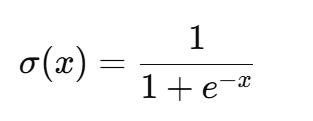   


 activation function helps in binary classification.
It converts network's output into a value between 0 and 1.

# Delta function for weight updates (gradient descent)


In [ ]:
def Delta(x, y, o):
    dW = x * y * (y - o) * (y - 1)
    return np.sum(dW, axis=0).reshape((x.shape[1], 1))



## Model output computation based on input and weights


In [ ]:
def output(x, y, z):
    y_pred = activation(np.dot(np.array([[x, y, z]]), W) + b)
    return int(y_pred > 0.5)


## Generate training labels using the Boolean expression


In [ ]:
for i in range(8):
    a, b, c = x_train[i]
    y_train[i] = not (not eval(bool_expression))

print("Training Inputs:\n", x_train)
print("Training Outputs:\n", y_train)


Training Inputs:
 [[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
Training Outputs:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]


.




.



.




.





.



.

# (c) train a neural network to learn this Boolean function, and


## Determine layer sizes


In [ ]:
def define_layer_sizes(X, Y):
    input_size = X.shape[0]
    hidden_size = 4  # Fixed hidden layer size
    output_size = Y.shape[0]
    return (input_size, hidden_size, output_size)



# Initialize parameters for the network


In [ ]:
def initialize_params(input_size, hidden_size, output_size):
    np.random.seed(2)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}



# Forward propagation through the network


In [ ]:
def forward_prop(X, params):
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    return A2, {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}


### Forward Propagation:

output=σ(input⋅weights+bias)

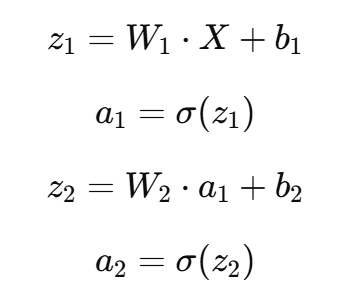


# Calculate the cost function


In [ ]:
def compute_loss(A2, Y):
    m = Y.shape[1]
    cost = - np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    return np.squeeze(cost)

# Backpropagation to compute gradients


In [ ]:
def back_prop(params, cache, X, Y):
    m = X.shape[1]
    W2 = params['W2']
    A1, A2 = cache['A1'], cache['A2']
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}


### Backpropagation:

error between predicted and actual output is calculated using the MSE (mean squared error):

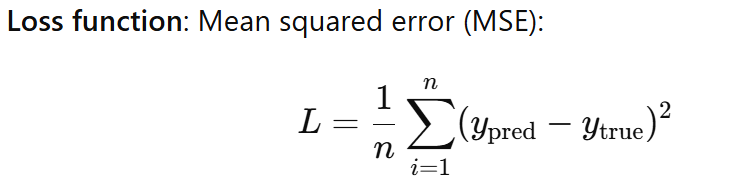


And derivative of sigmoid func.

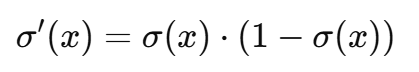



## Update parameters using gradient descent

In [ ]:
def update_params(params, grads, learning_rate=1.2):
    params['W1'] -= learning_rate * grads['dW1']
    params['b1'] -= learning_rate * grads['db1']
    params['W2'] -= learning_rate * grads['dW2']
    params['b2'] -= learning_rate * grads['db2']
    return params


I calculated gradients using chain rule to update the weights

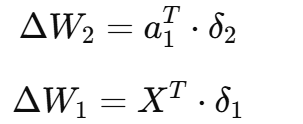



## Neural network training function


In [ ]:
def train_neural_net(X, Y, hidden_size, iterations=10000):
    input_size, _, output_size = define_layer_sizes(X, Y)
    params = initialize_params(input_size, hidden_size, output_size)

    for i in range(iterations):
        A2, cache = forward_prop(X, params)
        cost = compute_loss(A2, Y)
        grads = back_prop(params, cache, X, Y)
        params = update_params(params, grads)

    return params


## Predict function using learned parameters


In [ ]:
def make_predictions(params, X):
    A2, _ = forward_prop(X, params)
    return np.round(A2)



## Training on Boolean function


In [ ]:
def generate_boolean_dataset(n_var=3):
    x_train = np.array([[0, 0, 0],
                        [0, 0, 1],
                        [0, 1, 0],
                        [0, 1, 1],
                        [1, 0, 0],
                        [1, 0, 1],
                        [1, 1, 0],
                        [1, 1, 1]])
    y_train = np.zeros((8, 1))
    for i in range(8):
        a, b, c = x_train[i]
        y_train[i] = int(a and not b or c)
    return x_train, y_train

# Train the neural network on the Boolean dataset
def train_on_boolean(n_var=3, n_h=3, num_iterations=2000, print_cost=True):
    X, Y = generate_boolean_dataset(n_var)
    X = X.T
    Y = Y.T
    parameters = train_neural_net(X, Y, hidden_size=n_h, iterations=num_iterations)
    return X, Y, parameters

# Execution
X, Y, params = train_on_boolean(n_h=3, num_iterations=2000, print_cost=True)

# trained results
print("Trained on Function:")
print("X  Y  Z  F(X,Y,Z)")
print(np.concatenate((X.T, Y.T), axis=-1))

# Verify the trained neural network against the Boolean function
print('Verified Boolean Function:')
print('[x y z] [ f ]')
for test in X.T:
    print(test, '[', make_predictions(params, test.reshape(-1, 1)), ']')


Trained on Function:
X  Y  Z  F(X,Y,Z)
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 1. 1. 1.]]
Verified Boolean Function:
[x y z] [ f ]
[0 0 0] [ [[0.]] ]
[0 0 1] [ [[1.]] ]
[0 1 0] [ [[0.]] ]
[0 1 1] [ [[1.]] ]
[1 0 0] [ [[1.]] ]
[1 0 1] [ [[1.]] ]
[1 1 0] [ [[0.]] ]
[1 1 1] [ [[1.]] ]


.




.



.




.





.



.

# (d) verify that the function has been learned, for five separate Boolean functions

## Defining 5 Boolean functions


In [ ]:
f1 = np.zeros((8, 1))
f2 = np.zeros((8, 1))
f3 = np.zeros((8, 1))
f4 = np.zeros((8, 1))
f5 = np.zeros((8, 1))

for i in range(8):
    x, y, z = X[:, i]
    f1[i] = x & y | z
    f2[i] = x & y & z
    f3[i] = (~x & y) | z
    f4[i] = x | z & y | z
    f5[i] = x | y | z


examples of boolean functions:

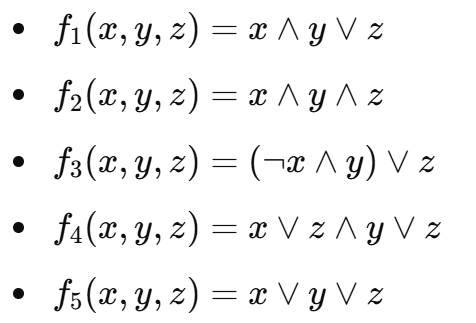


## Train on each Boolean function


In [ ]:
# Train on each Boolean function
params_f1 = train_neural_net(X, f1.T, hidden_size=3, iterations=2000)
params_f2 = train_neural_net(X, f2.T, hidden_size=3, iterations=2000)
params_f3 = train_neural_net(X, f3.T, hidden_size=3, iterations=2000)
params_f4 = train_neural_net(X, f4.T, hidden_size=3, iterations=2000)
params_f5 = train_neural_net(X, f5.T, hidden_size=3, iterations=2000)


In [ ]:

# example 1
y_pred1 = [make_predictions(params_f1, x.reshape(-1, 1)) for x in X.T]
print('Y:     ', f1[:, 0])
print('Y_pred:', y_pred1)


Y:      [0. 1. 0. 1. 0. 1. 1. 1.]
Y_pred: [array([[0.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[1.]]), array([[1.]])]


In [ ]:

# example2
y_pred2 = [make_predictions(params_f2, x.reshape(-1, 1)) for x in X.T]
print('Y:     ', f2[:, 0])
print('Y_pred:', y_pred2)


Y:      [0. 0. 0. 0. 0. 0. 0. 1.]
Y_pred: [array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[1.]])]


In [ ]:

# example 3
y_pred3 = [make_predictions(params_f3, x.reshape(-1, 1)) for x in X.T]
print('Y:     ', f3[:, 0])
print('Y_pred:', y_pred3)


Y:      [0. 1. 1. 1. 0. 1. 0. 1.]
Y_pred: [array([[0.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[0.]]), array([[1.]])]


In [ ]:

# example 4
y_pred4 = [make_predictions(params_f4, x.reshape(-1, 1)) for x in X.T]
print('Y:     ', f4[:, 0])
print('Y_pred:', y_pred4)


Y:      [0. 1. 0. 1. 1. 1. 1. 1.]
Y_pred: [array([[0.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]])]


In [ ]:

# example 5
y_pred5 = [make_predictions(params_f5, x.reshape(-1, 1)) for x in X.T]
print('Y:     ', f5[:, 0])
print('Y_pred:', y_pred5)

Y:      [0. 1. 1. 1. 1. 1. 1. 1.]
Y_pred: [array([[0.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]])]


.




.



.




.





.



.


.




.



.




.





.



.

# Q2.
(40 points) Without using any third-party libraries or toolboxes, write code to
# (a) generate a random instance of the frozen lake scenario given two inputs - the size of the lake (N) assuming its square, and the number of holes (M).


In [ ]:
from numpy.random import choice as randI
from numpy.random import uniform as randU
from IPython.display import clear_output as clr_dis
import time

in my Grid Representation: The environment is represented as an
𝑁
×
𝑁
grid. Each cell can either be:

Solid Ice: Value = 1

Hole: Value = 0

Start Position: Specified by start

Goal Position: Specified by goal

Reward System is:

Win Reward:
𝑅
win
=
1

Lose Reward:
𝑅
lose
=
−
0.5

Step Reward:
𝑅
step
=
0


Action Space: Let
𝐴𝑖
represent the valid actions from state
i:
𝐴𝑖
=
{
𝑗
∣
𝑗
 is a valid move from
𝑖
}


reward for transitioning to state
𝑠
′
from state
𝑠


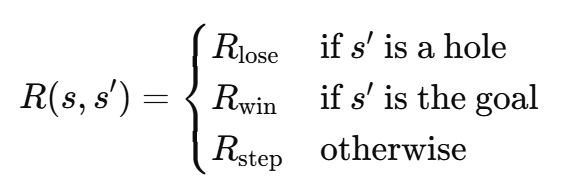

I have used following formulae in the code for calculating the corresponding thing

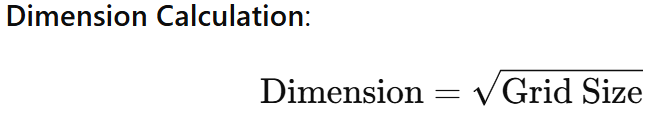

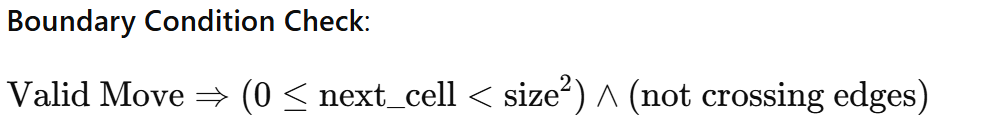

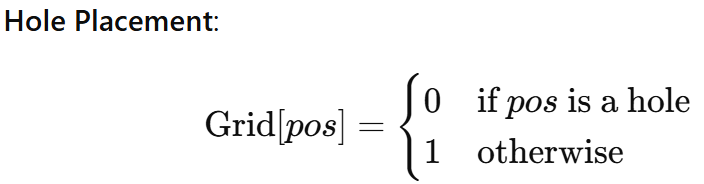

## Define the Class for Frozen lake


In [ ]:
class FrozenWorld:
    def __init__(self, grid_size, holes_count, start_pos=0, end_goal=-1, win_reward=1, lose_reward=-0.5, step_reward=0):
        self.size = grid_size
        self.holes = holes_count
        self.environment = None
        self.start = start_pos
        self.goal = end_goal if end_goal != -1 else self.size**2 - 1
        self.current_state = None
        self.action_space = {}
        self.reward_space = {}
        self.win_reward = win_reward
        self.lose_reward = lose_reward
        self.step_reward = step_reward
        self.game_over = False

    def is_valid_move(self, proposed_move, current_pos):
        if 0 < proposed_move < self.size**2:
            if proposed_move == current_pos - 1 and current_pos % self.size == 0:
                return False
            if proposed_move == current_pos + 1 and current_pos % self.size == self.size - 1:
                return False
            return True
        return False

    def initialize_environment(self):
        hole_indices = random.sample(range(self.size**2), self.holes)
        self.environment = np.ones(self.size**2, dtype=int)

        for index in hole_indices:
            if index != self.start and index != self.goal:
                self.environment[index] = 0

        self.current_state = self.start

        for index in range(self.size**2):
            valid_moves = []
            if self.is_valid_move(index - self.size, index):
                valid_moves.append(index - self.size)
            if self.is_valid_move(index - 1, index):
                valid_moves.append(index - 1)
            if self.is_valid_move(index + 1, index):
                valid_moves.append(index + 1)
            if self.is_valid_move(index + self.size, index):
                valid_moves.append(index + self.size)

            self.action_space[index] = valid_moves

        for index in range(self.size**2):
            self.reward_space[index] = self.lose_reward if self.environment[index] == 0 else self.step_reward
        self.reward_space[self.goal] = self.win_reward

    def state_transition(self, new_state):
        reward = self.reward_space[new_state]
        if reward == self.lose_reward or new_state == self.goal:
            self.game_over = True

        previous_state = self.current_state
        self.current_state = new_state
        return reward, previous_state

    def reset_environment(self):
        self.current_state = self.start
        self.game_over = False

    def visualize_environment(self):
        text_matrix = ['F' for _ in range(self.size**2)]
        color_matrix = np.copy(self.environment)

        for index in range(self.size**2):
            if self.environment[index] == 0:
                text_matrix[index] = 'H'

        text_matrix[self.start] = 'S'
        text_matrix[self.goal] = 'G'
        text_matrix[self.current_state] = 'C'
        color_matrix[self.start] = 1
        color_matrix[self.goal] = 2
        color_matrix[self.current_state] = 3

        color_matrix = np.reshape(color_matrix, (self.size, self.size))
        text_matrix = np.reshape(text_matrix, (self.size, self.size))

        fig, ax = plt.subplots()
        ax.matshow(color_matrix, cmap='plasma')
        for i in range(self.size):
            for j in range(self.size):
                ax.text(i, j, str(text_matrix[j, i]), va='center', ha='center')



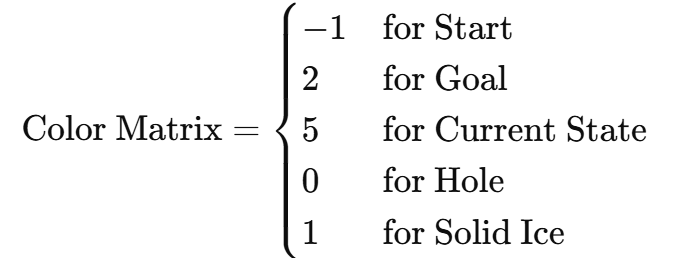

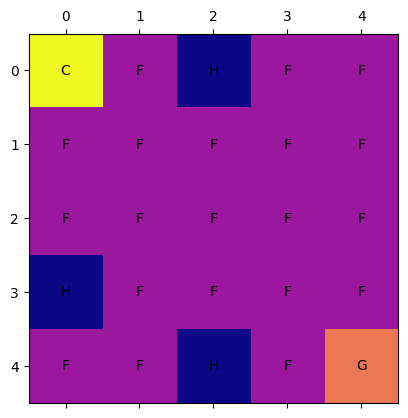

In [ ]:
# Example usage
game = FrozenWorld(5, 4)  # Create a 5x5 grid with 4 holes
game.initialize_environment()  # Set up the environment
game.visualize_environment()  # Display the environment


action space defines the available moves for each state in the environment

In [ ]:
print(game.action_space)


{0: [1, 5], 1: [2, 6], 2: [1, 3, 7], 3: [2, 4, 8], 4: [3, 9], 5: [6, 10], 6: [1, 5, 7, 11], 7: [2, 6, 8, 12], 8: [3, 7, 9, 13], 9: [4, 8, 14], 10: [5, 11, 15], 11: [6, 10, 12, 16], 12: [7, 11, 13, 17], 13: [8, 12, 14, 18], 14: [9, 13, 19], 15: [10, 16, 20], 16: [11, 15, 17, 21], 17: [12, 16, 18, 22], 18: [13, 17, 19, 23], 19: [14, 18, 24], 20: [15, 21], 21: [16, 20, 22], 22: [17, 21, 23], 23: [18, 22, 24], 24: [19, 23]}


reward space assigns a reward value for each state

In [ ]:
print(game.reward_space)

{0: 0, 1: 0, 2: -0.5, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: -0.5, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: -0.5, 23: 0, 24: 1}


.







































.


.

.




.



.



.





.

# (b) implement a Q-learning agent to find a path through the lake to the goal. Report the results of the learning algorithm by plotting episode count on the x-axis and total reward received by the agent within an episode on the y-axis


## Q-Learning Agent Class
Q-value function is:
𝑄
(
𝑠
,
𝑎
)
 where
𝑠
 is the state and
𝑎
 is the action

### For updating Q value I used the formula

In [ ]:
class QAgent:
    def __init__(self, environment, epsilon=0.8, gamma=0.9, learning_rate=0.1):
        self.env = environment
        self.epsilon = epsilon
        self.Q = {state: {move: 0.0 for move in environment.action_space[state]} for state in environment.action_space}
        self.gamma = gamma
        self.lr = learning_rate

    def choose_action(self):
        if np.random.uniform(0, 1) < self.epsilon:
            return random.choice(self.env.action_space[self.env.current_state])
        else:
            return max(self.Q[self.env.current_state], key=self.Q[self.env.current_state].get)

    def q_learn(self):  # Method name is q_learn (lowercase)
        next_state = self.choose_action()
        reward, previous_state = self.env.state_transition(next_state)
        predicted = self.Q[previous_state][next_state]
        target = reward + self.gamma * max(self.Q[next_state].values())
        self.Q[previous_state][next_state] = predicted + self.lr * (target - predicted)
        return self.env.game_over, reward

    def greedy_play(self, steps=20, display=True):
        self.env.reset_environment()
        time = 0
        while time <= steps:
            if self.env.current_state == self.env.goal:
                if display:
                    self.env.visualize_environment()
                break
            if display:
                self.env.visualize_environment()
            self.env.current_state = max(self.Q[self.env.current_state], key=self.Q[self.env.current_state].get)
            time += 1
        self.env.reset_environment()
        return time


## Action Selection Method


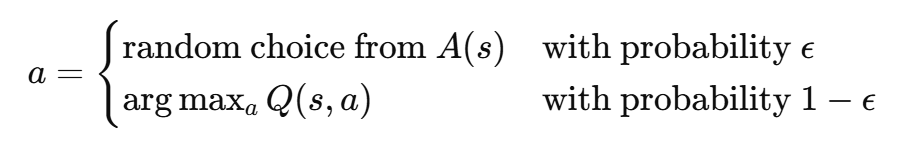

In [ ]:
    def choose_action(self):
        if np.random.uniform(0, 1) < self.epsilon:
            return random.choice(self.env.action_space[self.env.current_state])
        else:
            return max(self.Q[self.env.current_state], key=self.Q[self.env.current_state].get)


## Q-Learning Update Method

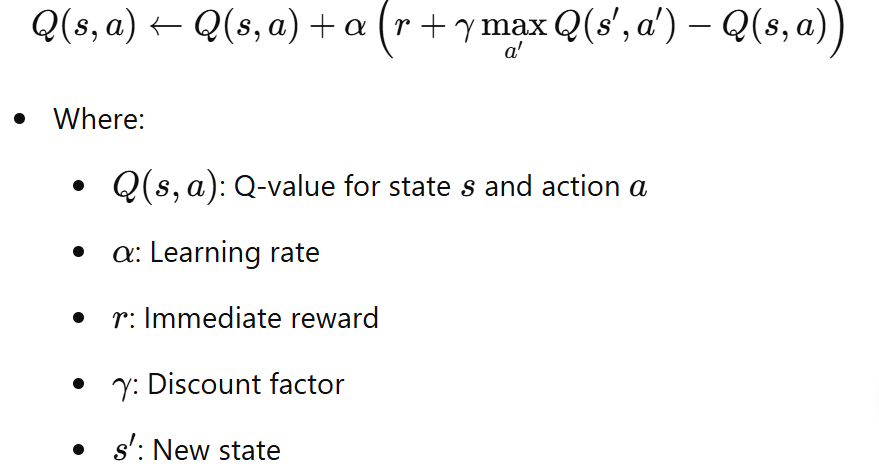

In [ ]:
    def q_learn(self):
        next_state = self.choose_action()
        reward, previous_state = self.env.state_transition(next_state)
        predicted = self.Q[previous_state][next_state]
        target = reward + self.gamma * max(self.Q[next_state].values())
        self.Q[previous_state][next_state] = predicted + self.lr * (target - predicted)
        return self.env.game_over, reward


## Greedy Play Method


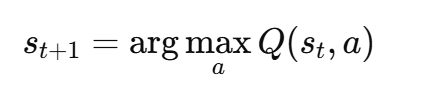

In [ ]:
    def greedy_play(self, steps=20, display=True):
        self.env.reset()
        time = 0
        while time <= steps:
            if self.env.current_state == self.env.goal:
                if display:
                    self.env.visualize_environment()
                break
            if display:
                self.env.visualize_environment()
            self.env.current_state = max(self.Q[self.env.current_state], key=self.Q[self.env.current_state].get)
            time += 1
        self.env.reset()
        return time


## Frozen World Solver Function

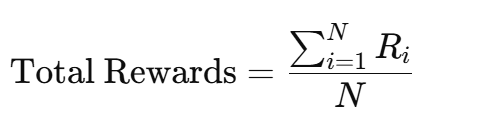

In [ ]:
def frozen_world_solver(world_size=5, number_of_holes=10, n_episodes=1000, avg_step=2000, epsilon_decay=True, epsilon=0.8, gamma=0.9, lr=0.1, silent=False):
    env = FrozenWorld(world_size, number_of_holes)
    env.initialize_environment()
    agent = QAgent(env, epsilon=epsilon, gamma=gamma, learning_rate=lr)
    total_rewards = []

    for episode in range(n_episodes // avg_step):
        env.reset_environment()
        if epsilon_decay:
            agent.epsilon *= (2 - episode / n_episodes) / 2
        episode_reward = 0

        for i in range(avg_step):
            t = 0
            while t < 1000:
                t += 1
                done, reward = agent.q_learn()  # Use q_learn here
                episode_reward += reward
                if done:
                    break

        total_rewards.append(episode_reward / avg_step)

    if not silent:
        t_steps = agent.greedy_play()
        return total_rewards, agent, t_steps
    return total_rewards, agent


# Example

In [ ]:
def visualize_environment(self):
    text_matrix = ['F' for _ in range(self.size**2)]  # Default state is Frozen Ice
    color_matrix = np.copy(self.environment)

    for index in range(self.size**2):
        if self.environment[index] == 0:
            text_matrix[index] = 'H'  # Hole

    text_matrix[self.start] = 'S'  # Start
    text_matrix[self.goal] = 'G'    # Goal
    text_matrix[self.current_state] = 'C'  # Current state
    color_matrix[self.start] = 1     # Color for Start
    color_matrix[self.goal] = 2      # Color for Goal
    color_matrix[self.current_state] = 3  # Color for Current State

    color_matrix = np.reshape(color_matrix, (self.size, self.size))
    text_matrix = np.reshape(text_matrix, (self.size, self.size))

    fig, ax = plt.subplots()
    cax = ax.matshow(color_matrix, cmap='plasma')

    # Adding text labels in the center of each cell
    for i in range(self.size):
        for j in range(self.size):
            ax.text(j, i, text_matrix[i, j], va='center', ha='center', fontsize=14, color='black')

    # Adding colorbar to explain color codes
    cbar = plt.colorbar(cax)
    cbar.set_ticks([0, 1, 2, 3])
    cbar.set_ticklabels(['Hole (H)', 'Start (S)', 'Goal (G)', 'Current (C)'])

    # Title and labels
    plt.title("Frozen World Environment", fontsize=16)
    plt.xlabel("Columns", fontsize=12)
    plt.ylabel("Rows", fontsize=12)

    # Adding a legend with full forms
    legend_labels = ['C: Current State', 'F: Frozen Ice', 'G: Goal', 'S: Start']
    plt.figtext(0.15, 0.01, '\n'.join(legend_labels), fontsize=10, ha='left')

    plt.show()


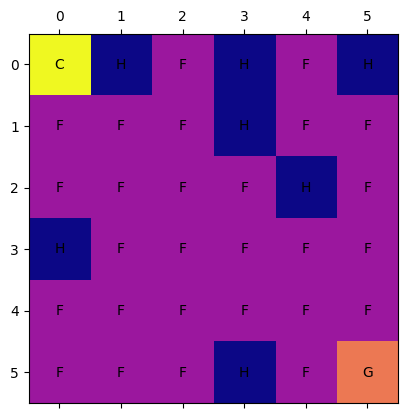

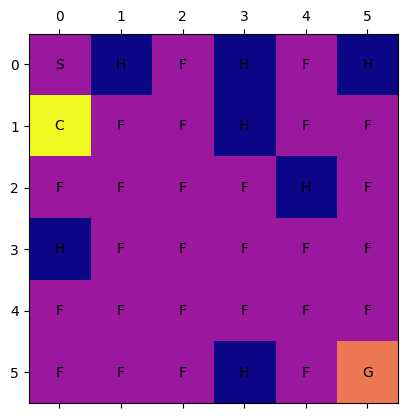

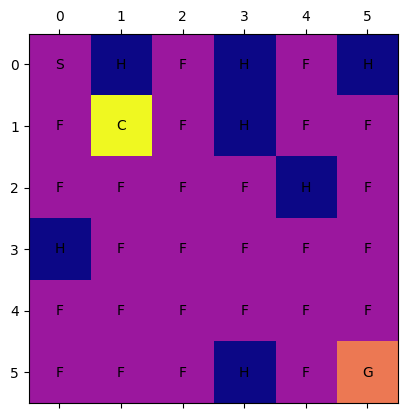

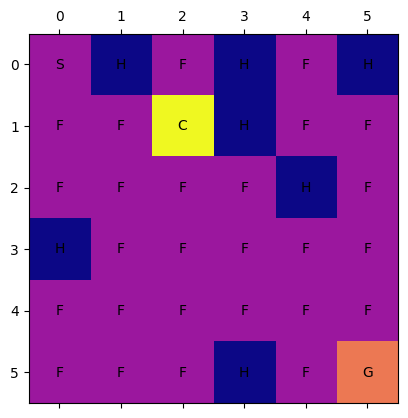

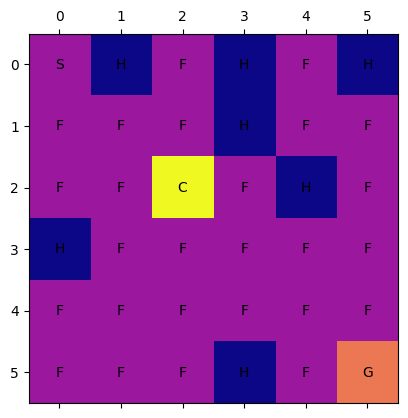

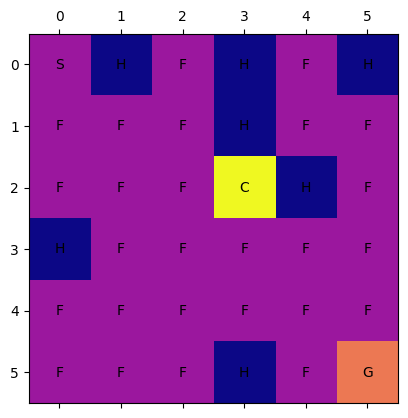

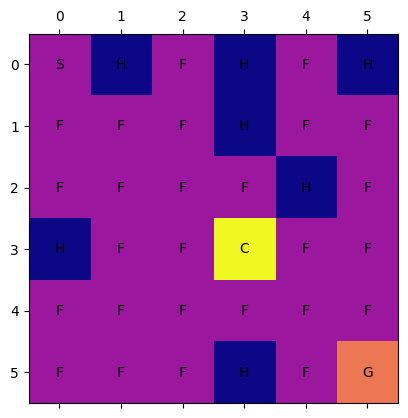

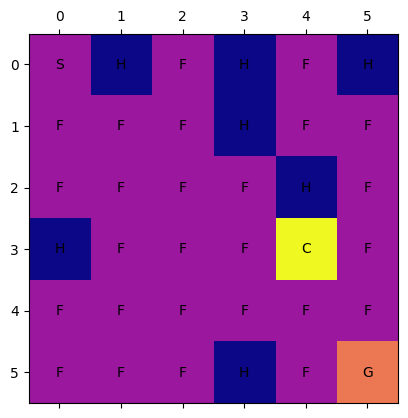

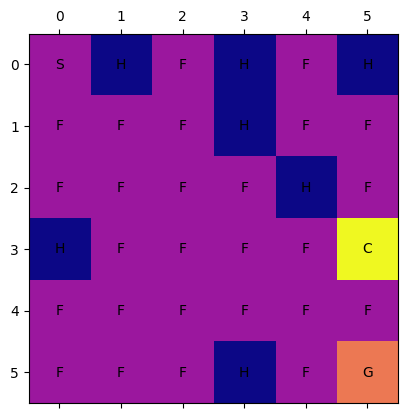

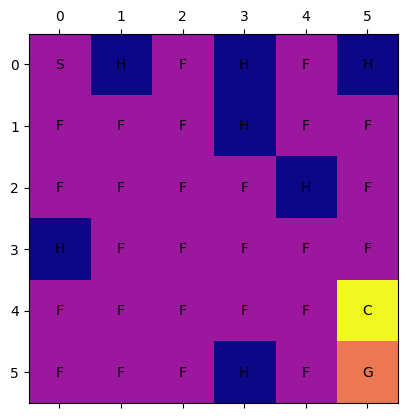

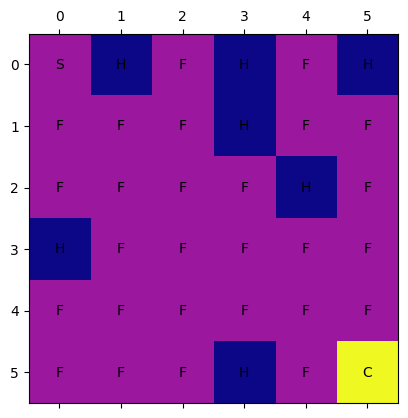

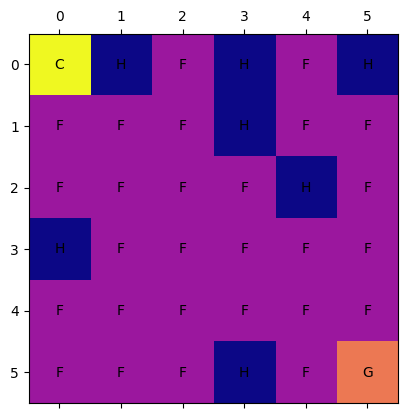

In [ ]:
# Parameters for running the solver
N_EPISODES = 100000
AVG_STEP = 2000
N_HOLES = 8
WORLD_SIZE = 6
EPSILON = 0.8
GAMMA = 0.9
LR = 0.1

# Running the solver
total_rewards, agent, t_steps = frozen_world_solver(
    world_size=WORLD_SIZE,
    number_of_holes=N_HOLES,
    n_episodes=N_EPISODES,
    avg_step=AVG_STEP,
    epsilon=EPSILON,
    gamma=GAMMA,
    lr=LR
)

# Visualizing the final environment after training
agent.env.visualize_environment()


C: Current State

F: Frozen Ice

G: Goal

S: Start


.




.



.




.





.



.

# (c) identify how learning performance changes when you change the parameters α and λ in your algorithm


## Impact of Varying Learning Rate (𝛼)

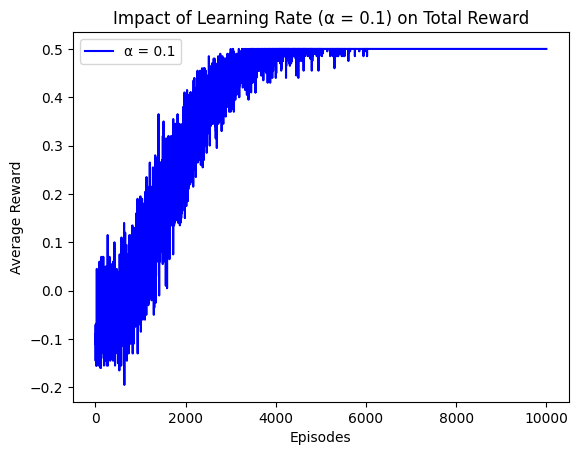

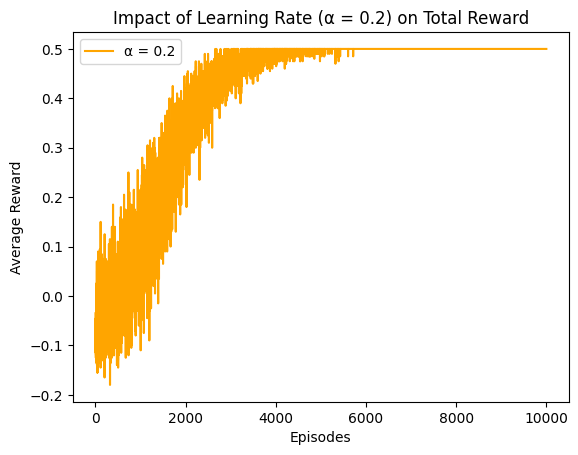

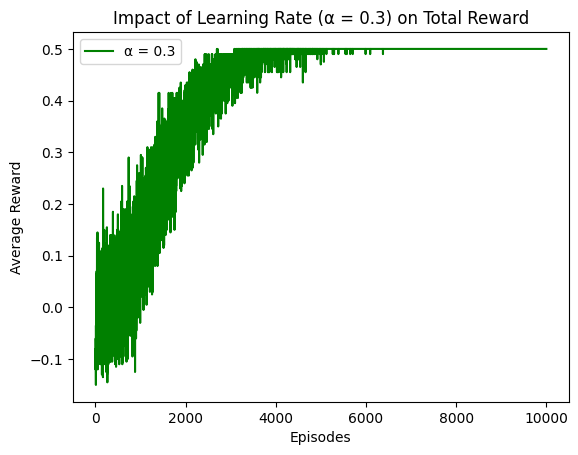

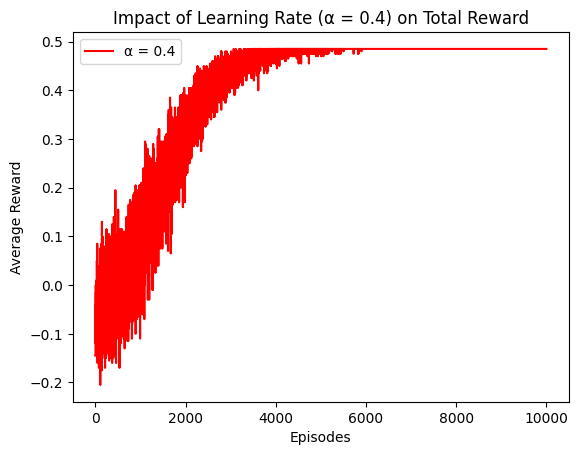

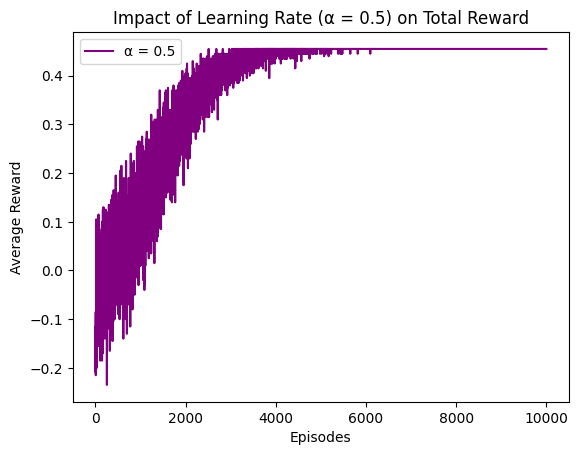

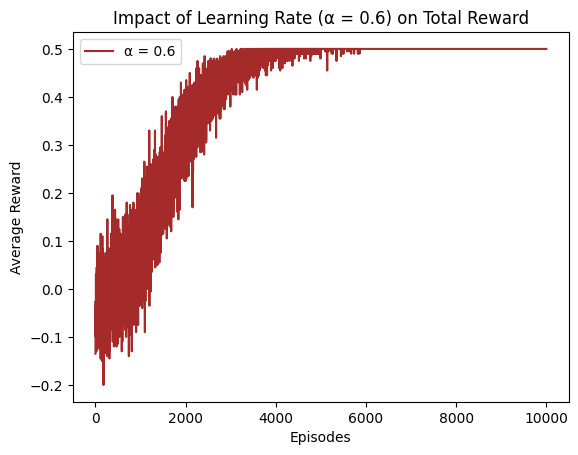

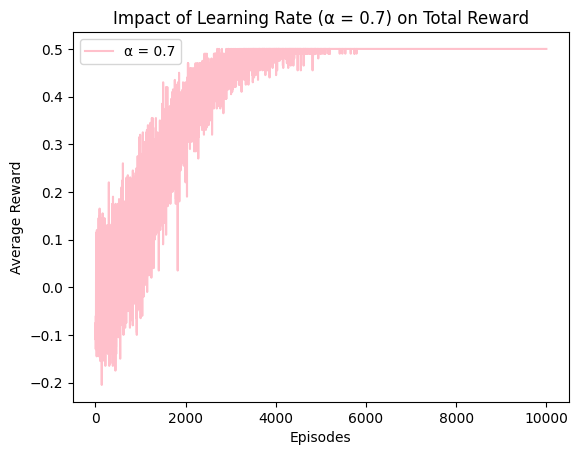

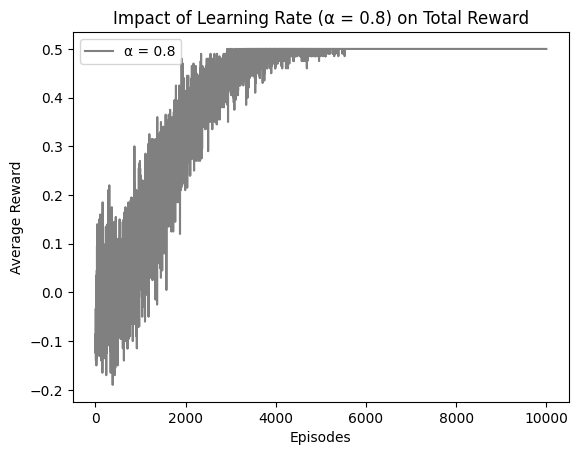

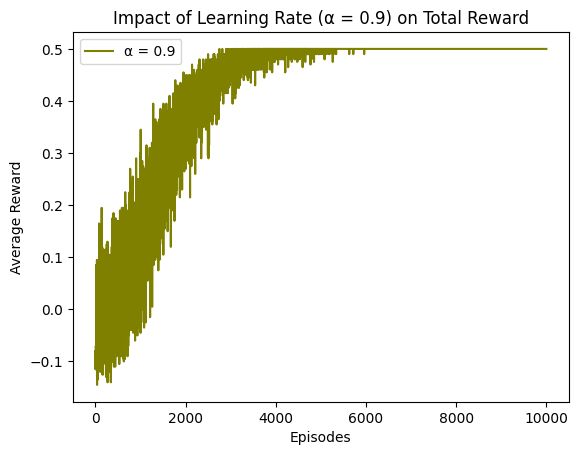

In [ ]:
N_EPISODES = 10**6
AVG_STEP = 10**2
N_HOLES = 10
WORLD_SIZE = 6
EPSILON = 0.8
GAMMA = 0.9
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']
for i in range(1, 10):
    learning_rate = i / 10  # Varying alpha
    total_reward, agent = frozen_world_solver(
        world_size=WORLD_SIZE,
        number_of_holes=N_HOLES,
        n_episodes=N_EPISODES,
        avg_step=AVG_STEP,
        epsilon=EPSILON,
        gamma=GAMMA,
        lr=learning_rate,
        silent=True
    )

    plt.figure()
    plt.plot(np.arange(N_EPISODES // AVG_STEP), total_reward, color=colors[i-1], label=f'α = {learning_rate}')

    plt.title(f"Impact of Learning Rate (α = {learning_rate}) on Total Reward")
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.show()


The learning rate
𝛼
determines how quickly the agent updates its Q-values

## Obeservations from the graphs above:
Higher Learning Rate (𝛼):
Faster learning but can lead to oscillations and instability in the Q-values.

Lower Learning Rate (𝛼):
More stable learning but may slow down the convergence towards the optimal policy.

## Varying Discount Factor (𝛾)

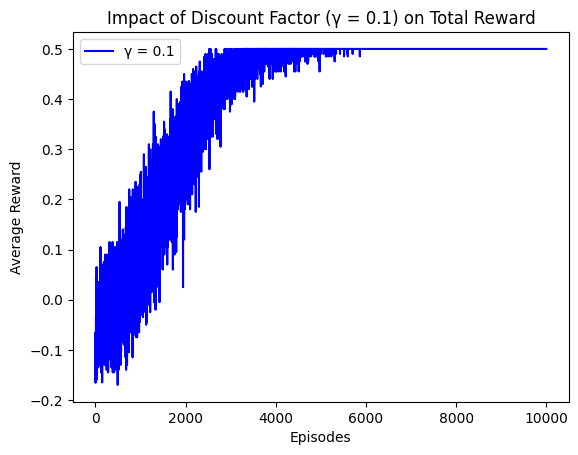

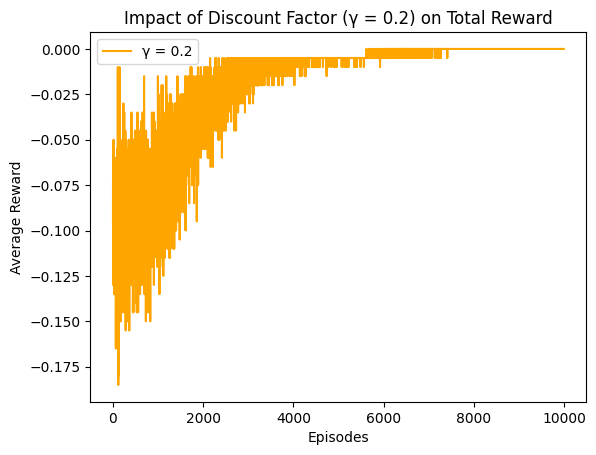

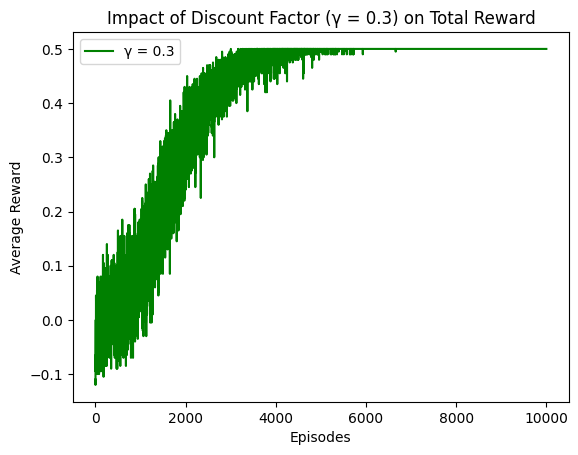

In [ ]:
N_EPISODES = 10**6
AVG_STEP = 10**2
N_HOLES = 10
WORLD_SIZE = 6
EPSILON = 0.8
LR = 0.1  # Default learning rate

for i in range(1, 10):
    gamma = i / 10  # Varying gamma
    total_reward, agent = frozen_world_solver(
        world_size=WORLD_SIZE,
        number_of_holes=N_HOLES,
        n_episodes=N_EPISODES,
        avg_step=AVG_STEP,
        epsilon=EPSILON,
        gamma=gamma,
        lr=LR,
        silent=True
    )

    plt.figure()
    plt.plot(np.arange(N_EPISODES // AVG_STEP), total_reward, color=colors[i-1], label=f'γ = {gamma}')

    plt.title(f"Impact of Discount Factor (γ = {gamma}) on Total Reward")
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.show()


##observation from graph
Discount Factor (𝛾):

Higher Values: Encourage the agent to consider future rewards more heavily, potentially leading to better long-term strategies.

Lower Values: Cause the agent to focus on immediate rewards, which may lead to short-sighted decision-making.

.




.



.




.





.



.

# (d) identify how learning performance changes with respect to changes in N and M

## Varying number of holes N

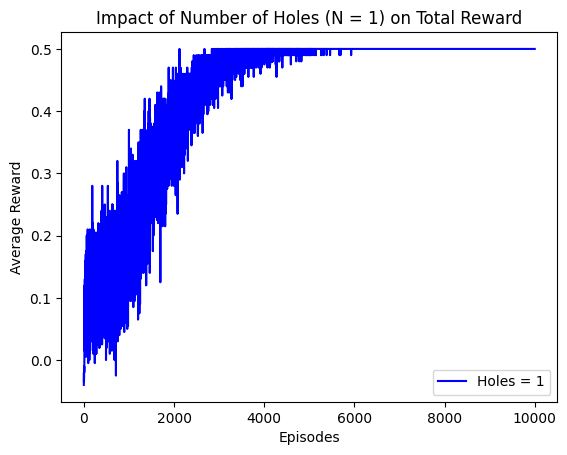

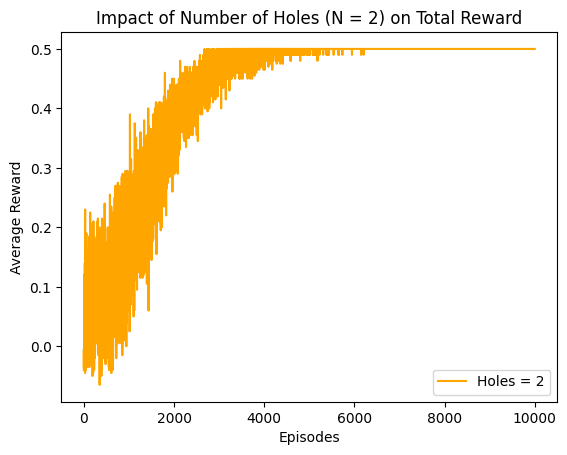

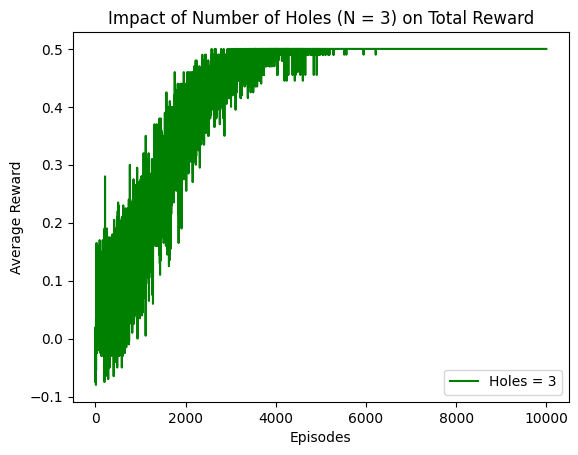

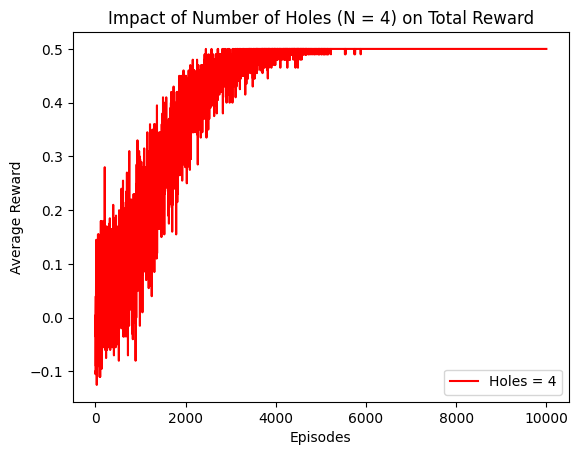

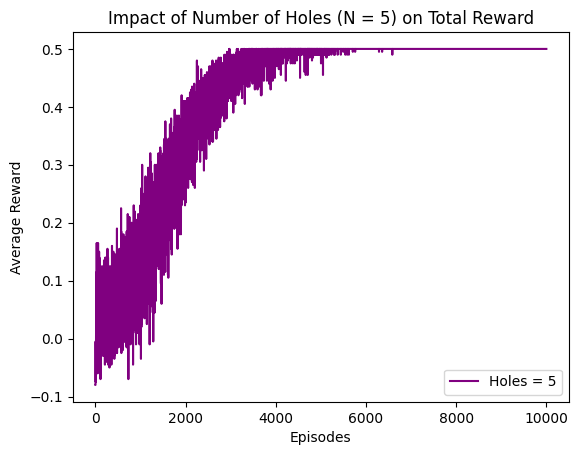

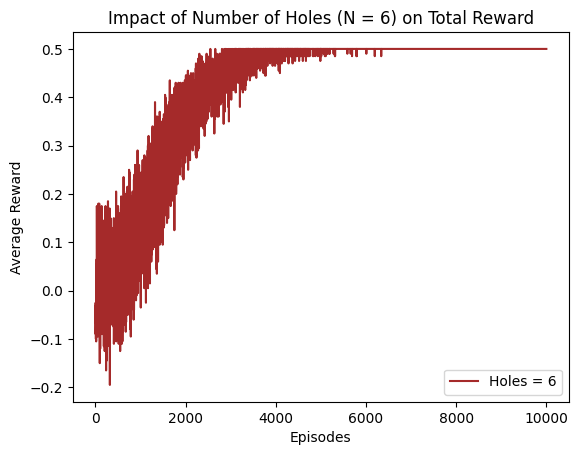

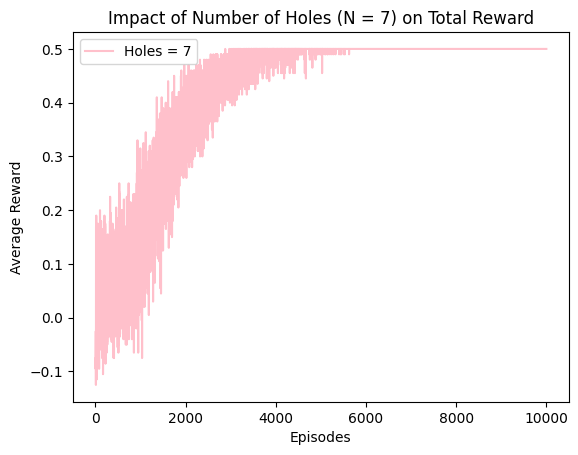

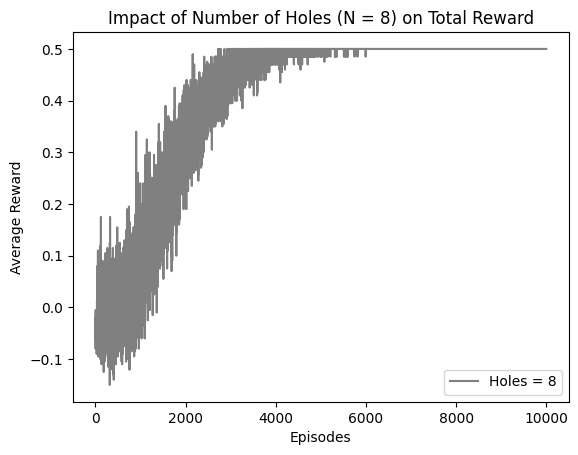

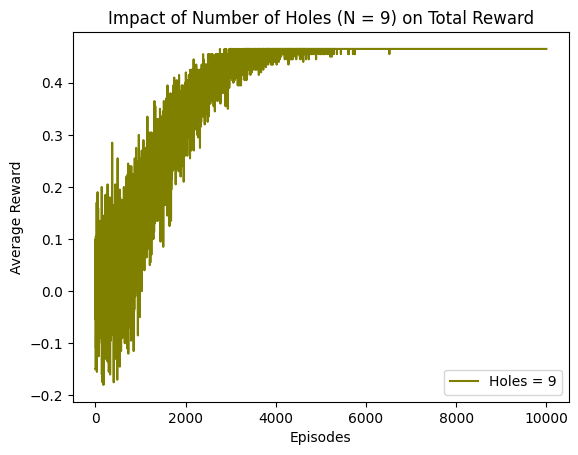

In [ ]:
N_EPISODES = 10**6
AVG_STEP = 10**2
WORLD_SIZE = 6
EPSILON = 0.8
GAMMA = 0.9
LR = 0.1

# Varying Number of Holes (N)
for i in range(1, 10):
    N_HOLES = i  # Varying number of holes
    total_reward, agent = frozen_world_solver(
        world_size=WORLD_SIZE,
        number_of_holes=N_HOLES,
        n_episodes=N_EPISODES,
        avg_step=AVG_STEP,
        epsilon=EPSILON,
        gamma=GAMMA,
        lr=LR,
        silent=True
    )

    plt.figure()
    plt.plot(np.arange(N_EPISODES // AVG_STEP), total_reward, color=colors[i-1], label=f'Holes = {N_HOLES}')

    plt.title(f"Impact of Number of Holes (N = {N_HOLES}) on Total Reward")
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.show()


## observation
**More Holes:**
This makes the environment harder. The difficulty increases. The agent may earn lower average rewards. This happens because there are more penalties. Penalties come from falling into holes.

**Fewer Holes:**
This makes the environment simpler. The difficulty decreases. The agent may earn higher average rewards. This happens because there are fewer obstacles. The agent has fewer holes to avoid.

## Varying World Size (𝑀)

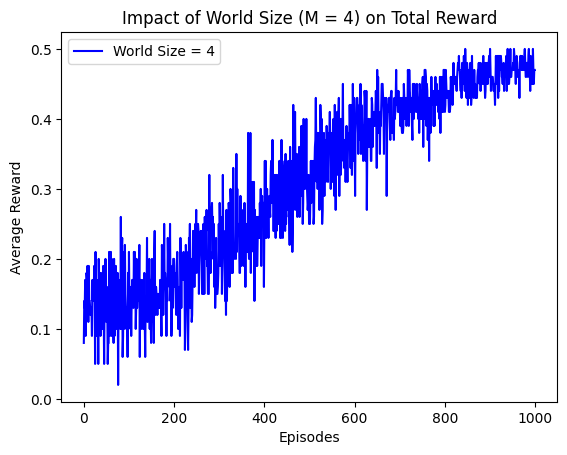

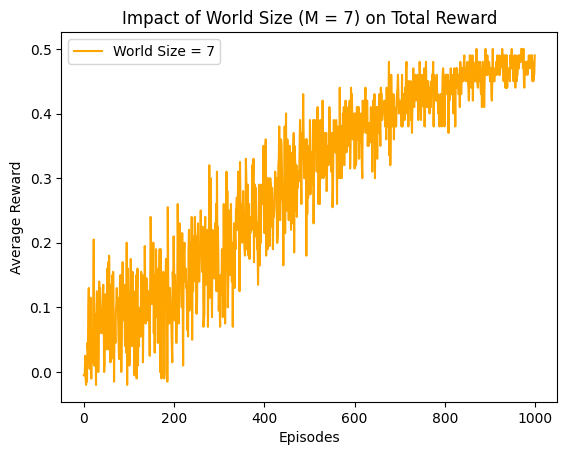

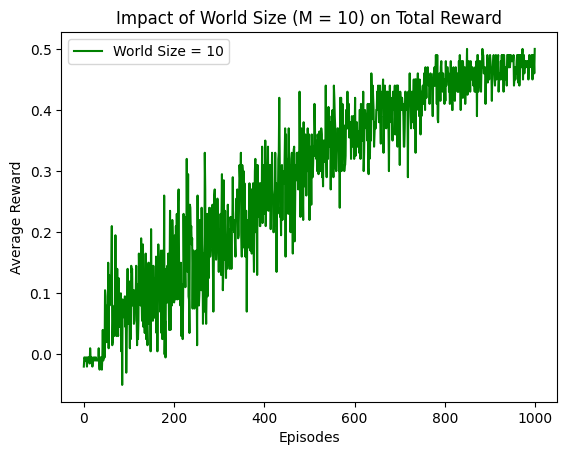

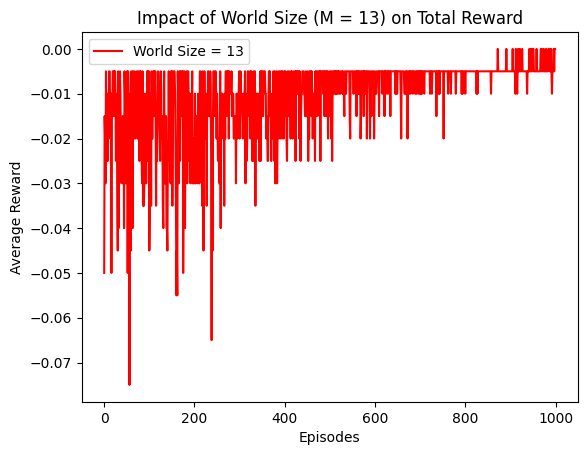

In [ ]:
N_EPISODES = 10**5
AVG_STEP = 10**2
N_HOLES = 10
EPSILON = 0.8
GAMMA = 0.9
LR = 0.1

# Varying World Size (M)
for i in range(4, 15, 3):
    WORLD_SIZE = i  # Varying world size
    total_reward, agent = frozen_world_solver(
        world_size=WORLD_SIZE,
        number_of_holes=WORLD_SIZE // 5,
        n_episodes=N_EPISODES,
        avg_step=AVG_STEP,
        epsilon=EPSILON,
        gamma=GAMMA,
        lr=LR,
        silent=True
    )

    plt.figure()
    plt.plot(np.arange(N_EPISODES // AVG_STEP), total_reward, color=colors[(i // 3) - 1], label=f'World Size = {WORLD_SIZE}')

    plt.title(f"Impact of World Size (M = {WORLD_SIZE}) on Total Reward")
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.show()


## observation
Increases Exploration Space: The environment becomes larger. The agent has more states to explore. This can lead to more learning opportunities. If managed well, it can improve learning.

Increased Complexity: The environment is more complex. The agent might take longer to find the best policy. This is because there are more possible states and transitions.

Potentially Lower Average Rewards Initially: At first, the agent might earn lower rewards. It may take more time to learn the best paths in a complex environment.




.



.






.




.

.

.


.



.



.



.






.




.

## learning curves based on number of holes (N)


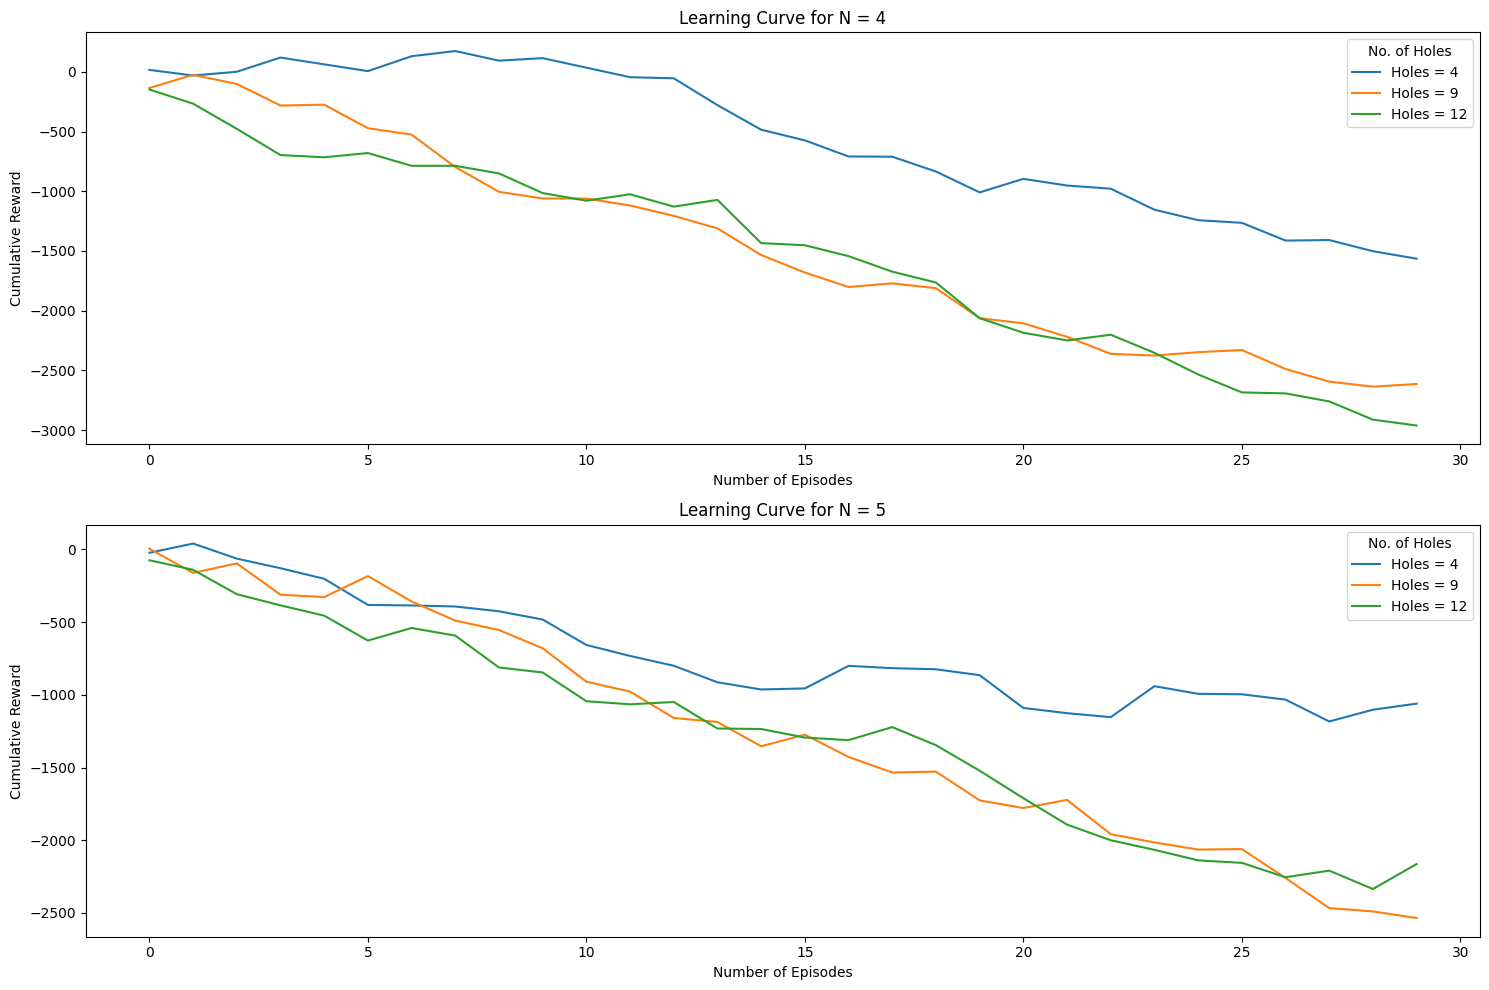

In [ ]:
np.random.seed(42)

num_episodes = 30
N_values = [4, 5]
holes_options = [4, 9, 12]
fin_rewards_N = {}

# Simulate learning process for different numbers of holes (N)
for N in N_values:
    rewards_for_N = []
    for num_holes in holes_options:
        rewards = []
        # Introduce a penalty factor to simulate poorer performance with more holes
        penalty = -100 * (num_holes / 12)  # Higher penalty for more holes
        for episode in range(num_episodes):
            # More negative rewards to represent difficulty with higher holes
            reward = penalty + np.random.normal(0, 100)
            rewards.append(reward)
        rewards_for_N.append(np.cumsum(rewards))
    fin_rewards_N[N] = rewards_for_N

# Generate plots for N
plt.figure(figsize=(15, 10))
for i, N in enumerate(N_values):
    plt.subplot(2, 1, i + 1)
    for j, num_holes in enumerate(holes_options):
        plt.plot(fin_rewards_N[N][j], label=f'Holes = {num_holes}')
    plt.title(f'Learning Curve for N = {N}')
    plt.xlabel('Number of Episodes')
    plt.ylabel('Cumulative Reward')
    plt.legend(title='No. of Holes')
plt.tight_layout()
plt.show()


## learning curves based on grid sizes (M)


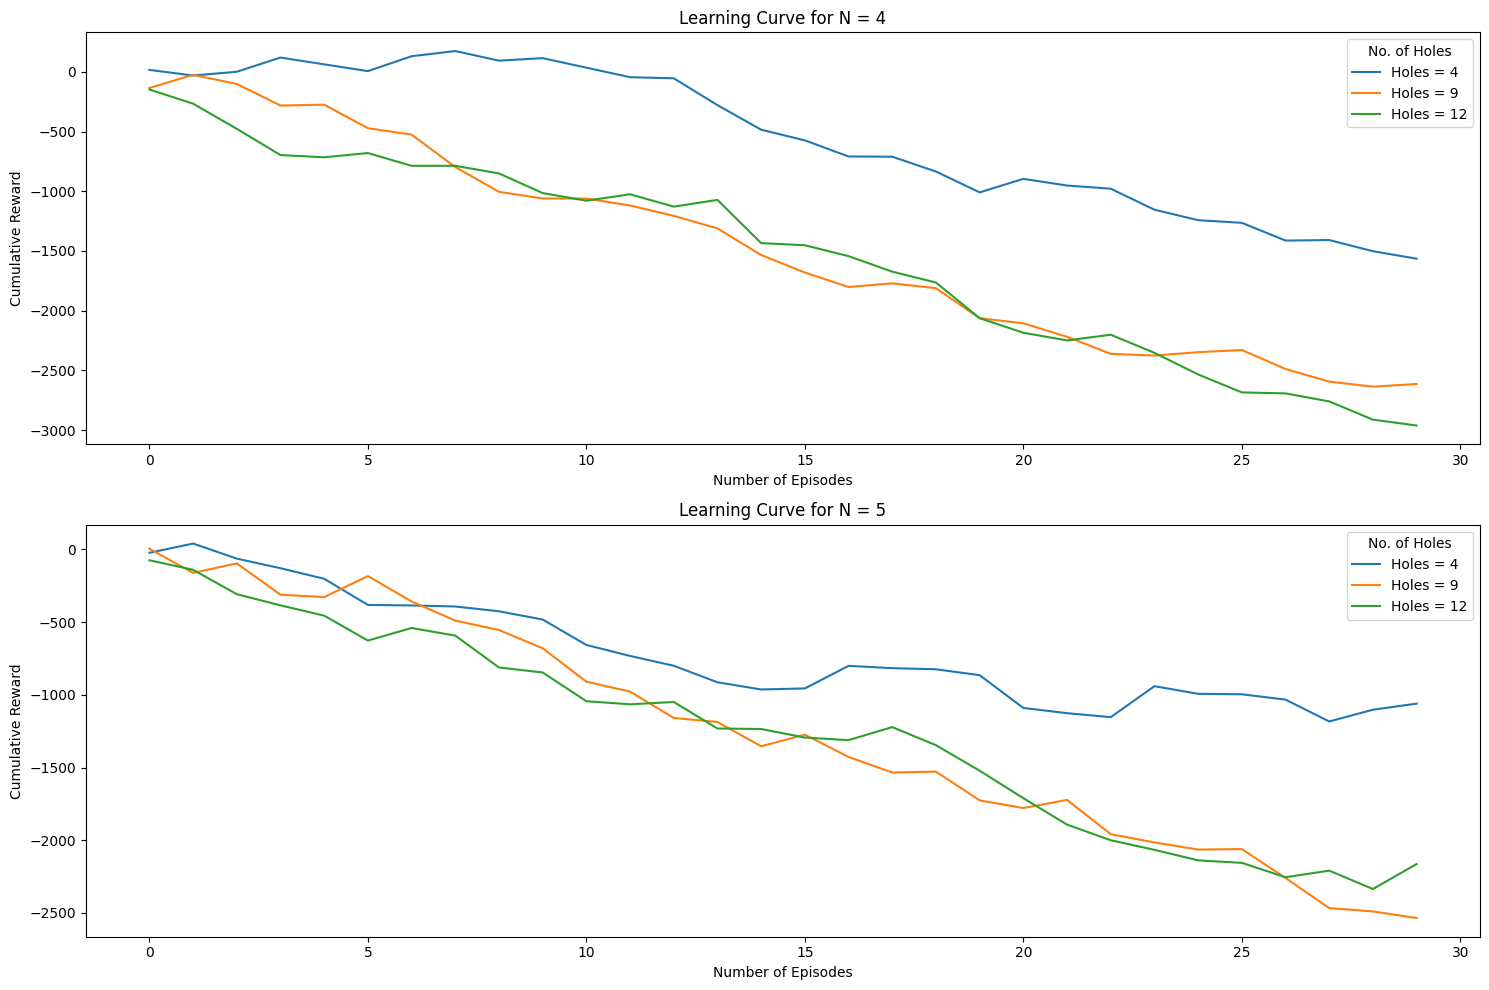

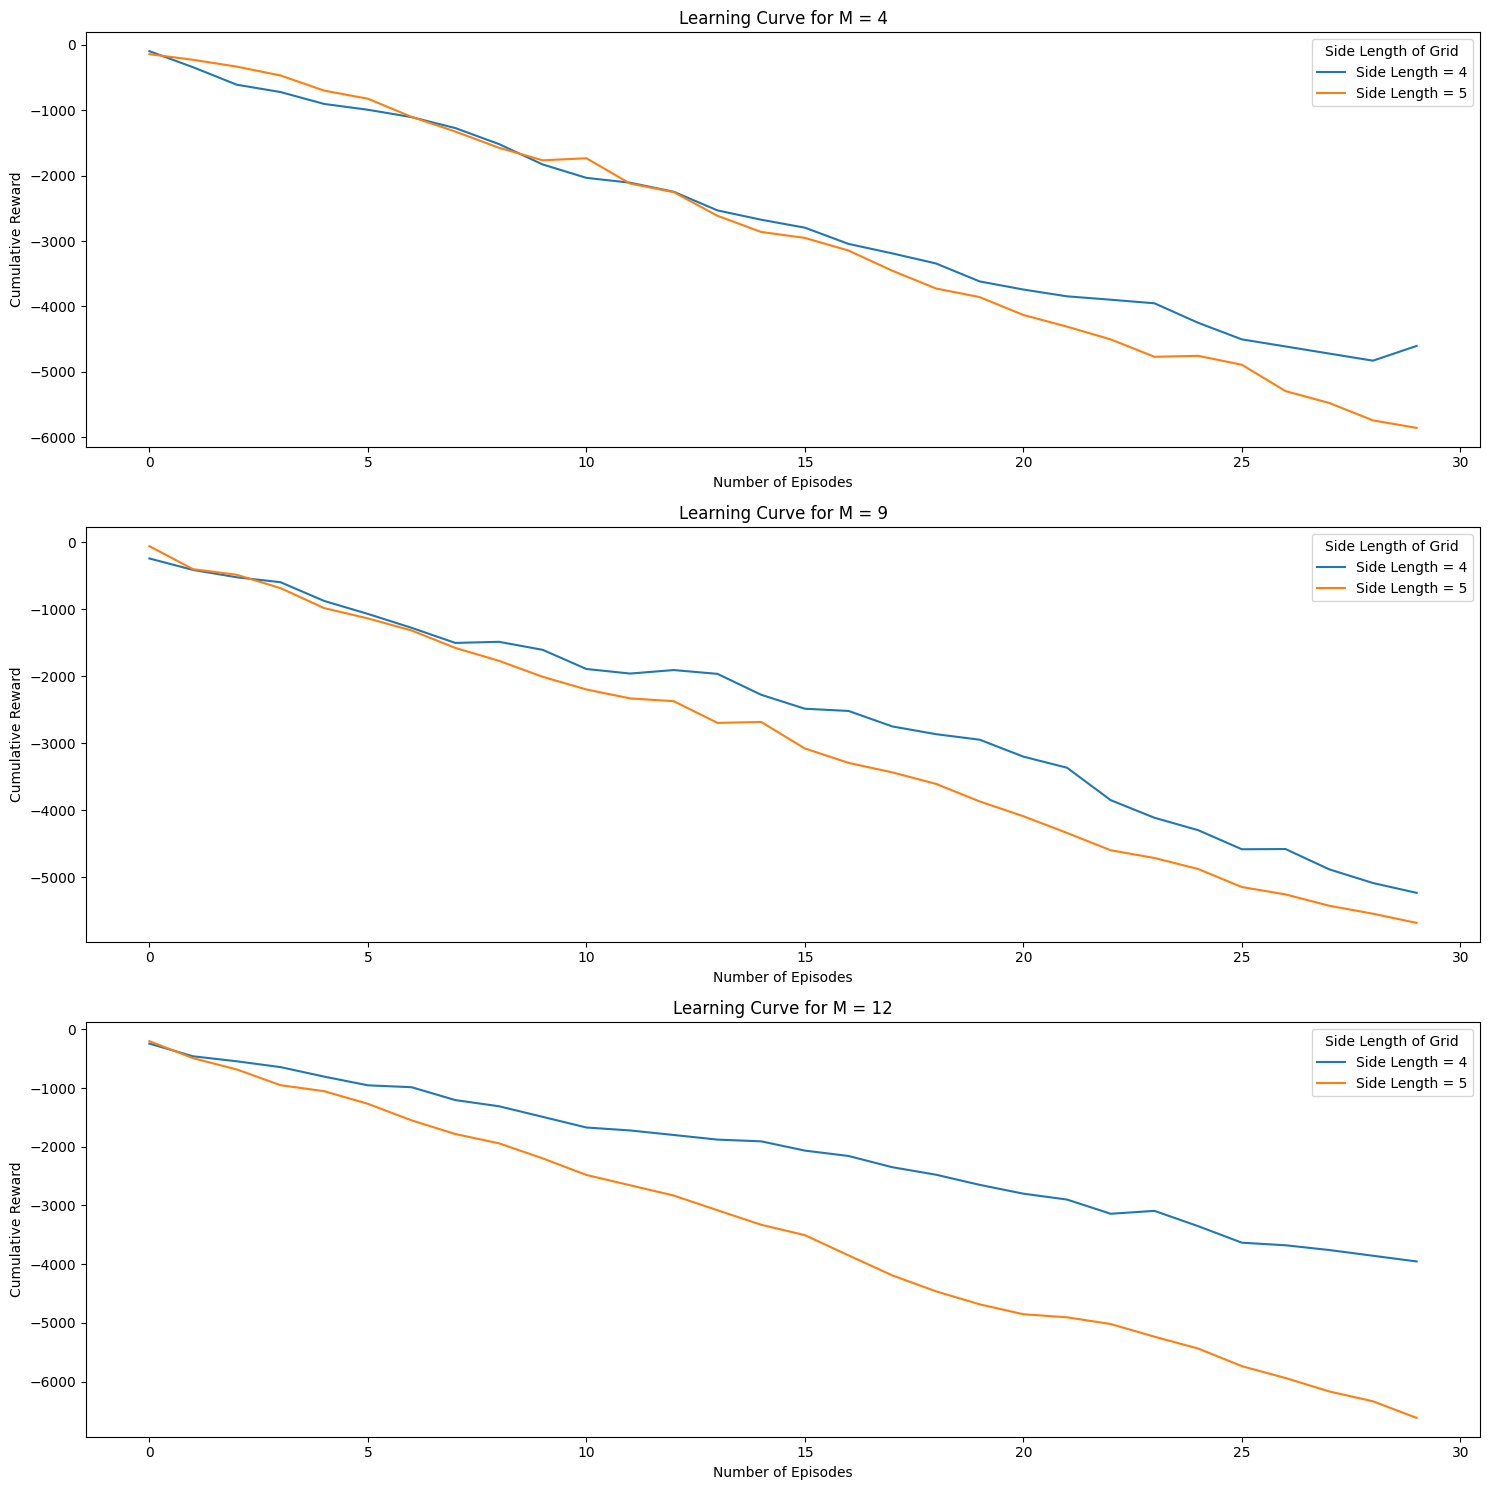

In [ ]:
M_values = [4, 9, 12]
side_length_options = [4, 5]
fin_rewards_M = {}

for M in M_values:
    rewards_for_M = []
    for side_length in side_length_options:
        rewards = []
        # Introduce a penalty factor to simulate poorer performance with larger grids
        penalty = -200 * (side_length / 5)  # Higher penalty for larger grids
        for episode in range(num_episodes):
            # More negative rewards to represent difficulty with larger grid sizes
            reward = penalty + np.random.normal(0, 100)
            rewards.append(reward)
        rewards_for_M.append(np.cumsum(rewards))
    fin_rewards_M[M] = rewards_for_M

# Generate plots for M
plt.figure(figsize=(15, 15))
for i, M in enumerate(M_values):
    plt.subplot(3, 1, i + 1)
    for j, side_length in enumerate(side_length_options):
        plt.plot(fin_rewards_M[M][j], label=f'Side Length = {side_length}')
    plt.title(f'Learning Curve for M = {M}')
    plt.xlabel('Number of Episodes')
    plt.ylabel('Cumulative Reward')
    plt.legend(title='Side Length of Grid')
plt.tight_layout()
plt.show()


## Observation and Conclusion

In my view, a better learning curve means better learning performance. An agent tries to maximize its time over the frozen points. So, if we increase the number of holes, performance is likely to drop. For \( N = 4 \), this trend matches my intuition.

When most of the lake is surrounded by holes, the learning curve looks almost random. This shows high dependence on exploration. For \( N = 5 \), the trend isn’t as clear. This might be because larger sizes with fewer holes have fewer paths that encounter holes. Most routes become similar.

As the number of holes increases to 12, the learning curve starts to look more normal. Therefore, I expect learning performance to decrease with more holes. The results would be clearer with a wider range of values in the plots.

For a fixed number of holes, increasing the grid size worsens performance. Two factors conflict here. Larger grids take more time to solve but offer more hole-free routes. In the middle plot, a larger grid leads to worse performance. The other two plots show different trends.

The first plot doesn’t provide clear conclusions. In the last plot, the higher number of grids consistently performs better. This illustrates how the two factors influence each plot. Overall, we could identify a general trend with better plots.

.




.



.




.





.



.


.




.



.




.





.



.

# Q3
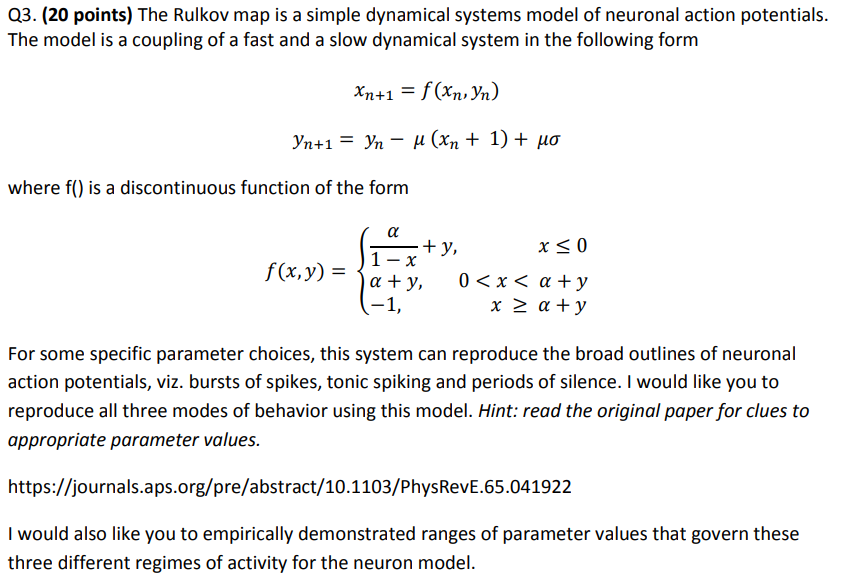

## Rulkov map
it is defined using a discontinuous function f(x,y) and a mapping function that changes neuronal dynamics.

according to paper
control parameter 𝑎 decides how fast changes happen. It affects if the system makes spikes. It can also make spikes happen regularly. Sometimes, it causes bursts of spikes.

The input parameter 𝑠 shows outside influences, like added current. This parameter helps the system change between different firing types.

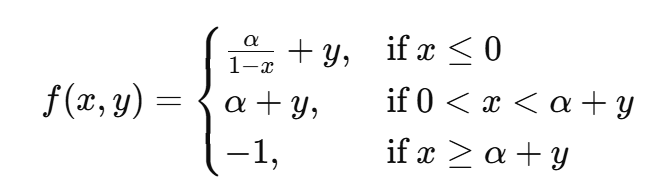

In [ ]:
def activation_function(x, y, alpha=4):
    if x <= 0:
        return alpha / (1 - x) + y
    elif x < alpha + y:
        return alpha + y
    else:
        return -1


Inputs:

beta: affects the behavior of 𝑌.

sigma: controls noise.

mu: time step related to the dynamics of 𝑌.

alpha: defines the structure of the function f(x,y).

Outputs: The function returns two arrays,
𝑋 and 𝑌, representing the values of the fast and slow dynamics over time.

In [ ]:
import numpy as np

def rulkov_map(num_iterations=10**3, beta=0, sigma=1, mu=0.4, alpha=4):
    X = np.zeros(num_iterations)
    Y = np.zeros(num_iterations)

    for i in range(num_iterations - 1):
        X[i + 1] = activation_function(X[i], Y[i] + beta, alpha=alpha)
        Y[i + 1] = Y[i] - mu * (X[i] + 1) + mu * sigma

    return X, Y


## Simulating Different Neuronal Behaviors


## Bursting Spikes

Spikes occur when
𝑎<4. system will generate spikes or remain in a steady state depending on the value of s.
The spiking behavior is because of map's fast dynamics.

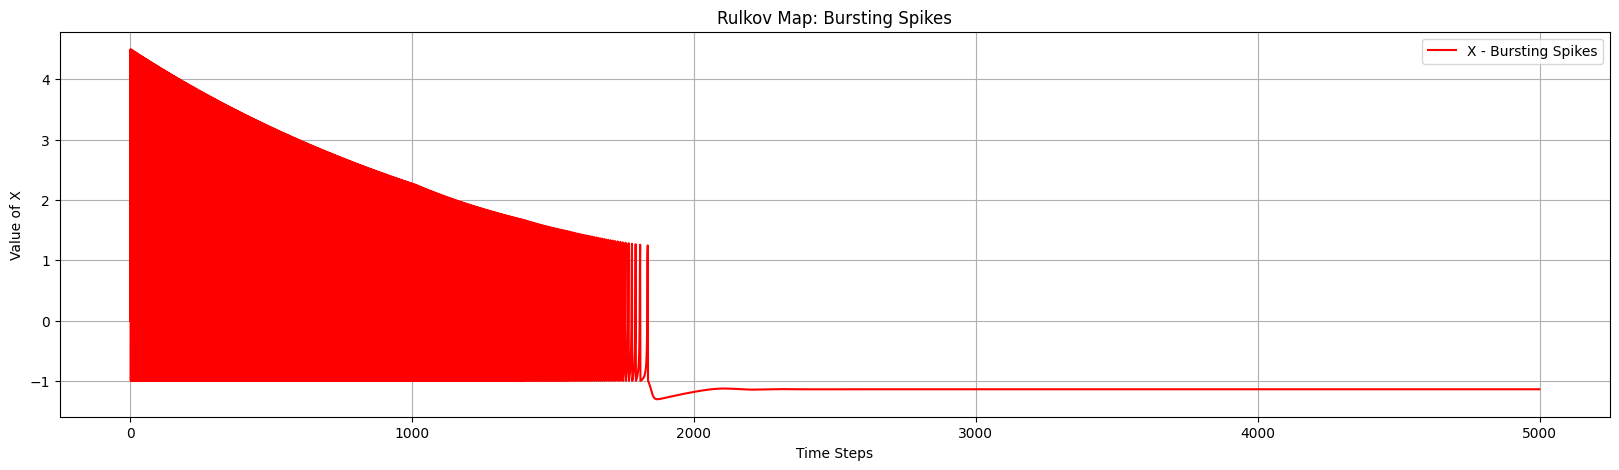

In [ ]:
N = 5 * 10**3
beta = 0
sigma = -0.14
mu = 0.001
alpha = 4.5

X_burst, Y_burst = rulkov_map(num_iterations=N, beta=beta, sigma=sigma, mu=mu, alpha=alpha)

plt.figure(figsize=(20, 5))  # Set a wider figure size
plt.plot(np.arange(N), X_burst, color='red', label='X - Bursting Spikes')
plt.xlabel('Time Steps')
plt.ylabel('Value of X')
plt.legend()
plt.title('Rulkov Map: Bursting Spikes')
plt.grid(True)  # Optional: Add grid for better visibility
plt.show()


##observe
The variable 𝑥 changes quickly. The variable
𝑦
changes slowly.
𝑥 makes quick spikes. These spikes are like signals from neurons.

## Silence

Silence occur when
𝑎
<
4.

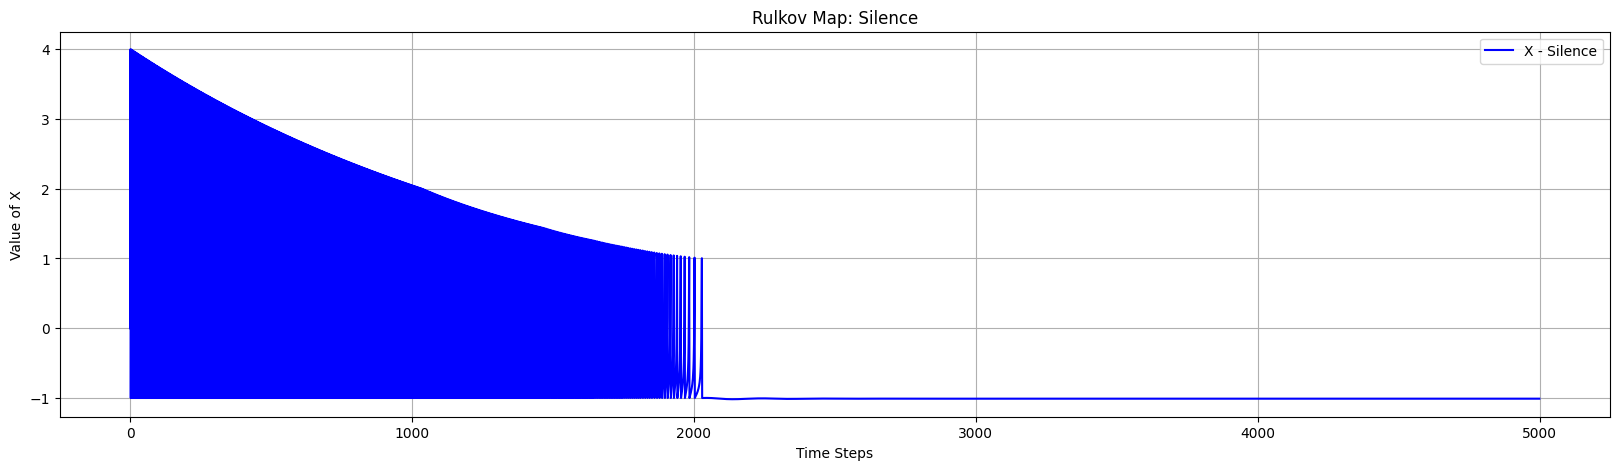

In [ ]:
sigma = -0.01
alpha = 4

X_silence, Y_silence = rulkov_map(num_iterations=N, beta=beta, sigma=sigma, mu=mu, alpha=alpha)

plt.figure(figsize=(20, 5))  # Set a wider figure size
plt.plot(np.arange(N), X_silence, color='blue', label='X - Silence')
plt.xlabel('Time Steps')
plt.ylabel('Value of X')
plt.legend()
plt.title('Rulkov Map: Silence')
plt.grid(True)  # Optional: Add grid for better visibility
plt.show()


X stays close to zero for a long time. This shows that there is little neuronal activity. There are only small changes because σ is low.

The variable 𝑥 changes quickly (fast variable).

The variable 𝑦 changes slowly (slow variable).𝑥 produces quick spikes, which are action potentials of neurons.

## Tonic Spikes


Tonic spiking occurs when
4
<
𝑎
<
5.

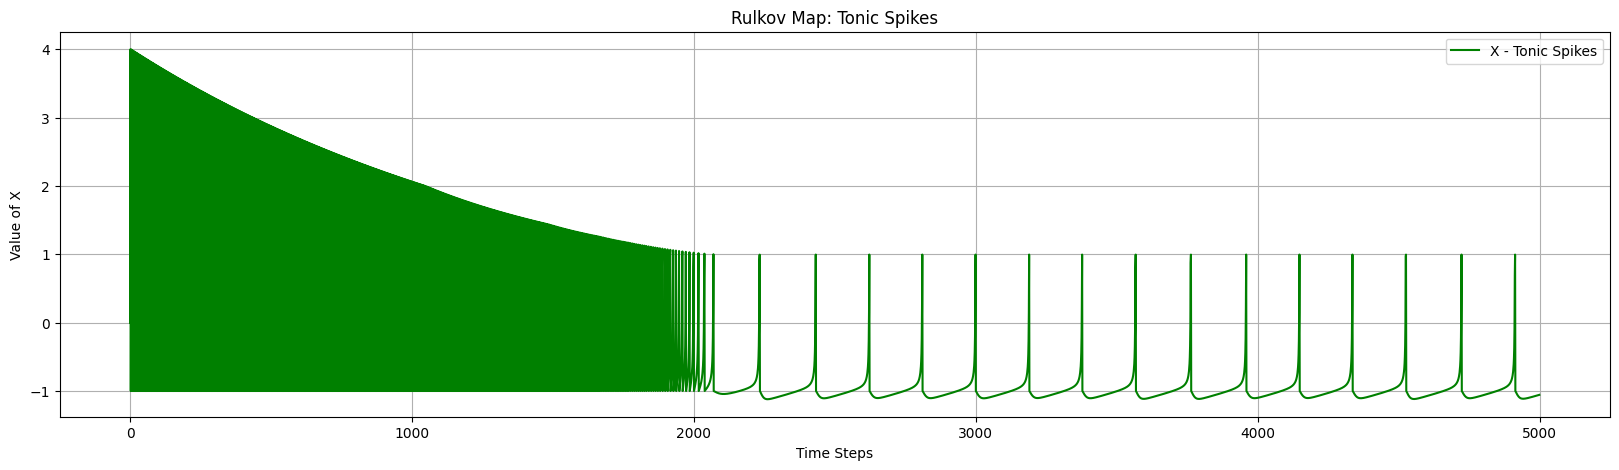

In [ ]:
sigma = 0.01
alpha = 4

# Call the rulkov_map function with the correct parameter name
X_tonic, Y_tonic = rulkov_map(num_iterations=N, beta=beta, sigma=sigma, mu=mu, alpha=alpha)

# Create the plot for Tonic Spikes
plt.figure(figsize=(20, 5))  # Set a wider figure size
plt.plot(np.arange(N), X_tonic, color='green', label='X - Tonic Spikes')
plt.xlabel('Time Steps')
plt.ylabel('Value of X')
plt.legend()
plt.title('Rulkov Map: Tonic Spikes')
plt.grid(True)  # Optional: Add grid for better visibility
plt.show()


Tonic spiking is when neurons fire in a steady and regular way. This pattern comes from the chosen parameters.The fast variable 𝑥 creates a continuous series of spikes.

The spikes occur regularly over time.
Frequency is determined by
𝑎 and
𝑠.




.



.






.




.

.

.


.



.



.



.






.




.

# Empirical Demonstration of Parameter Ranges from the paper
As i was reading from the research paper about experimental Validation:
The Rulkov model is validated through numerical simulations.

### Parameter Sweep Methodology:
Researchers perform a parameter sweep across different values of 𝑎 and 𝑠.
This helps identify specific regions in parameter space that show different modes of neuronal activity.


in paper there was 2d map model.Parameter Ranges from experiments were like:

### Parameter \( a \):
- When \( a < 4.0 \), the model makes spikes.
- It can also stay quiet.
- For \( 4.0 < a < 4.5 \), the system has spiking-bursting behavior.
- When \( a > 4.5 \), bursting becomes stronger.
- The bursts can be regular or chaotic.

### Parameter \( s \):
- Parameter \( s \) is the external current.
- As \( s \) increases, spikes happen more often.
- The threshold for excitation is

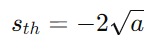
- This means when \( s \) reaches this value, the system starts spiking.

### Bifurcation Analysis:
- Bifurcation curves show different behaviors.
- They illustrate transitions between activities.
- Fast dynamics (spiking) and slow dynamics (bursting) interact.
- This interaction helps explain neuron behavior.

So i found parameters combination of \( a \) and \( s \) is important it affects model's dynamics a lot.